In [31]:
import pyglet as pg
import numpy as np
import matplotlib.pyplot as plt
import evolib as el
import cv2
from tqdm import tqdm

width = 1280
height = 720

window = pg.window.Window(width, height)

100%|██████████| 400/400 [02:11<00:00,  3.05it/s]


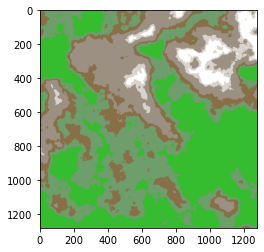

In [32]:
width = 64
height = 64

terrian = el.TerrianNoise(
    seed=12342214,
    frequency=0.8,
    power=3.0,
    roughness=10,
    chunk_size=64,
    world_size=2560,
)

# forest = el.TerrianNoise(
#     seed=123422347,
#     frequency=0.9,
#     power=2.0,
#     roughness=20,
#     chunk_size=64,
#     world_size=256,
# )

color_map = {
    0: [54, 188, 47],
    0.2: [110, 158, 107],
    0.4: [137, 111, 71],
    0.8: [155, 144, 129],
    0.9: [216, 212, 205],
    #5: [255, 0, 255],
}

size = 20

n1 = np.zeros((64*size, 64*size))
timer = tqdm(total=size*size)
for i in range(size):
    for j in range(size):
        timer.update(1)
        n1[i*64:(i+1)*64, j*64:(j+1)*64] = terrian.noise_chunk(i, j)

def apply_color_map(n):
    nu = np.zeros((len(n), len(n[0]), 3), dtype=np.uint8)
    for i in range(len(n)):
        for j in range(len(n[i])):
            for k in color_map.keys():
                if n[i][j] < k:
                    nu[i][j] = color_map[k]
                    break
            if n[i][j] > 0.9:
                nu[i][j] = [255, 255, 255]
    return nu

n = apply_color_map(n1)

plt.imshow(n)
plt.show()